In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats

### 1. Загрузите данные о красном вине

In [2]:
df = pd.read_csv("./HW3_wine/winequality/winequality-red.csv",header= 0, delimiter=";")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 2. Проверьте на наличие недостающих данных (достаточно проверить на наличие пропусков)

In [4]:
print("Проверим на пустые значения")
print(df.info())
print(df.isnull().sum())

Проверим на пустые значения
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar 

### 3. Преобразуйте метки к бинарным классам считая, что «хорошее» вино имеет качество 6 и выше. Для этого необходимо добавить в датафрейм новый столбец с бинарными классами 0,1.

In [5]:
print("Посмотрим на кол-во значений оценки quality")
df['quality'].value_counts()

Посмотрим на кол-во значений оценки quality


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [6]:
print("Вставить новый столбец с бинарным значением на основе столбца quality")
df['good'] = np.where(df['quality']>=6, 1, 0)

Вставить новый столбец с бинарным значением на основе столбца quality


In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


Рассчитайте и постройте графики: 
- найдите количество выбросов по столбцу Качество. Для этого найдите точки данных с экстремально высокими или низкими значениями; рассчитайте 25-й и 75-й процентили; вычислите диапазон выбросов, используя межквартильный диапазон 1,5 * (Q3 - Q1)
- удалите найденные выбросы 
- постройте график распределения по Качеству (distplot)
- постройте график и определите по нему баланс бинарных классов, используя бинарные метки
- найдите медиану по каждому признаку 
- постройте график “ящик с усами” по показателю качества


### Найдите количество выбросов по столбцу Качество. Для этого найдите точки данных с экстремально высокими или низкими значениями; рассчитайте 25-й и 75-й процентили; вычислите диапазон выбросов, используя межквартильный диапазон 1,5 * (Q3 - Q1)

In [8]:
# df.boxplot(column=['quality'])

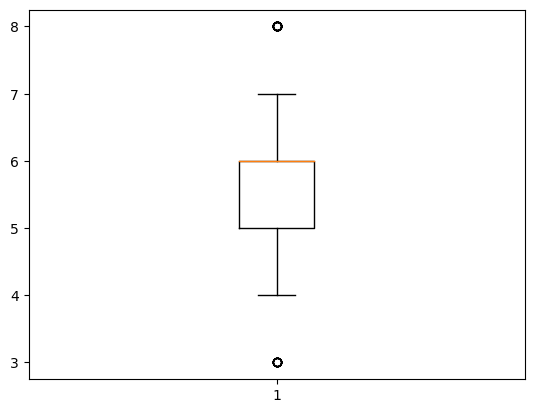

In [86]:
plt.boxplot(x=df['quality'])
plt.show()

In [82]:
np.percentile(df['quality'],[25,75])
# или
Q1 = df['quality'].quantile(q=.25)
Q3 = df['quality'].quantile(q=.75)

#interquartile
IQR_all = df.apply(stats.iqr)
print(Q1, Q3)
print(IQR_all)
IQR = IQR_all[-2]

5.0 6.0
fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
good                     1.000000
dtype: float64


1.0

### удалите найденные выбросы

In [83]:
df_clean = df[~((df.quality < (Q1-1.5*IQR)) | (df.quality > (Q3+1.5*IQR)))]

In [84]:
df_clean.shape

(1571, 13)

In [85]:
df_clean['quality'].value_counts()

5    681
6    638
7    199
4     53
Name: quality, dtype: int64

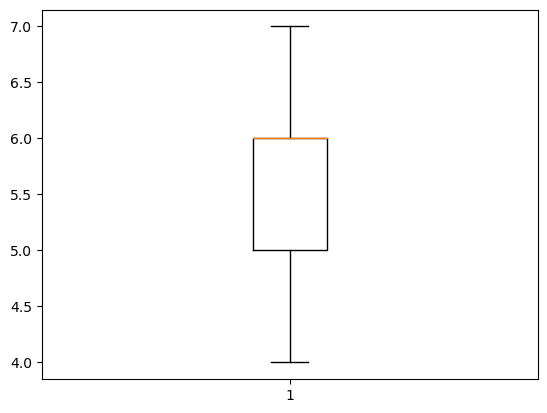

In [89]:
plt.boxplot(x=df_clean['quality'])
plt.show()

### постройте график распределения по Качеству (distplot)


/tmp/ipykernel_2325/3986227030.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['quality'],bins=4)


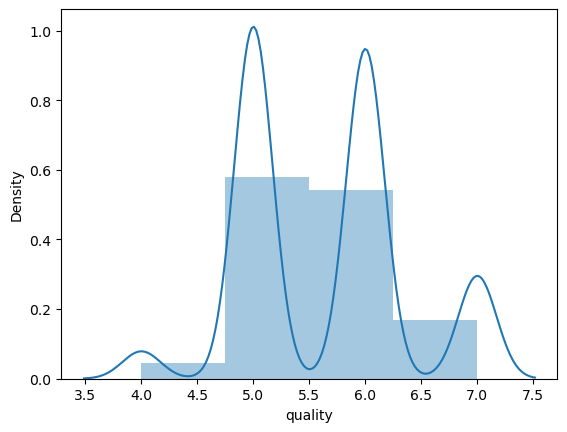

In [88]:
sns.distplot(df_clean['quality'],bins=4)
plt.show()

### постройте график и определите по нему баланс бинарных классов, используя бинарные метки

In [ ]:
#!!!!!!!!!!!!!!!

### найдите медиану по каждому признаку 

In [90]:
df_clean.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.10000
quality                  6.00000
good                     1.00000
dtype: float64

### постройте график “ящик с усами” по показателю качества

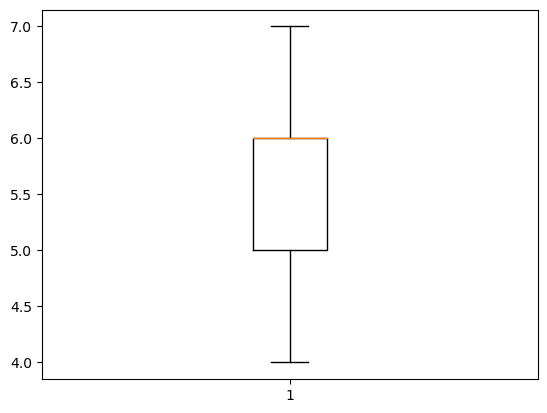

In [91]:
plt.boxplot(x=df_clean['quality'])
plt.show()

# постройте графики распределений значений каждого из 12 признаков 

/tmp/ipykernel_2325/2410372688.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean[col], ax=ax)
/tmp/ipykernel_2325/2410372688.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean[col], ax=ax)
/tmp/ipykernel_2325/2410372688.py:3: UserWarning: 

`distplot` is a deprecated functio

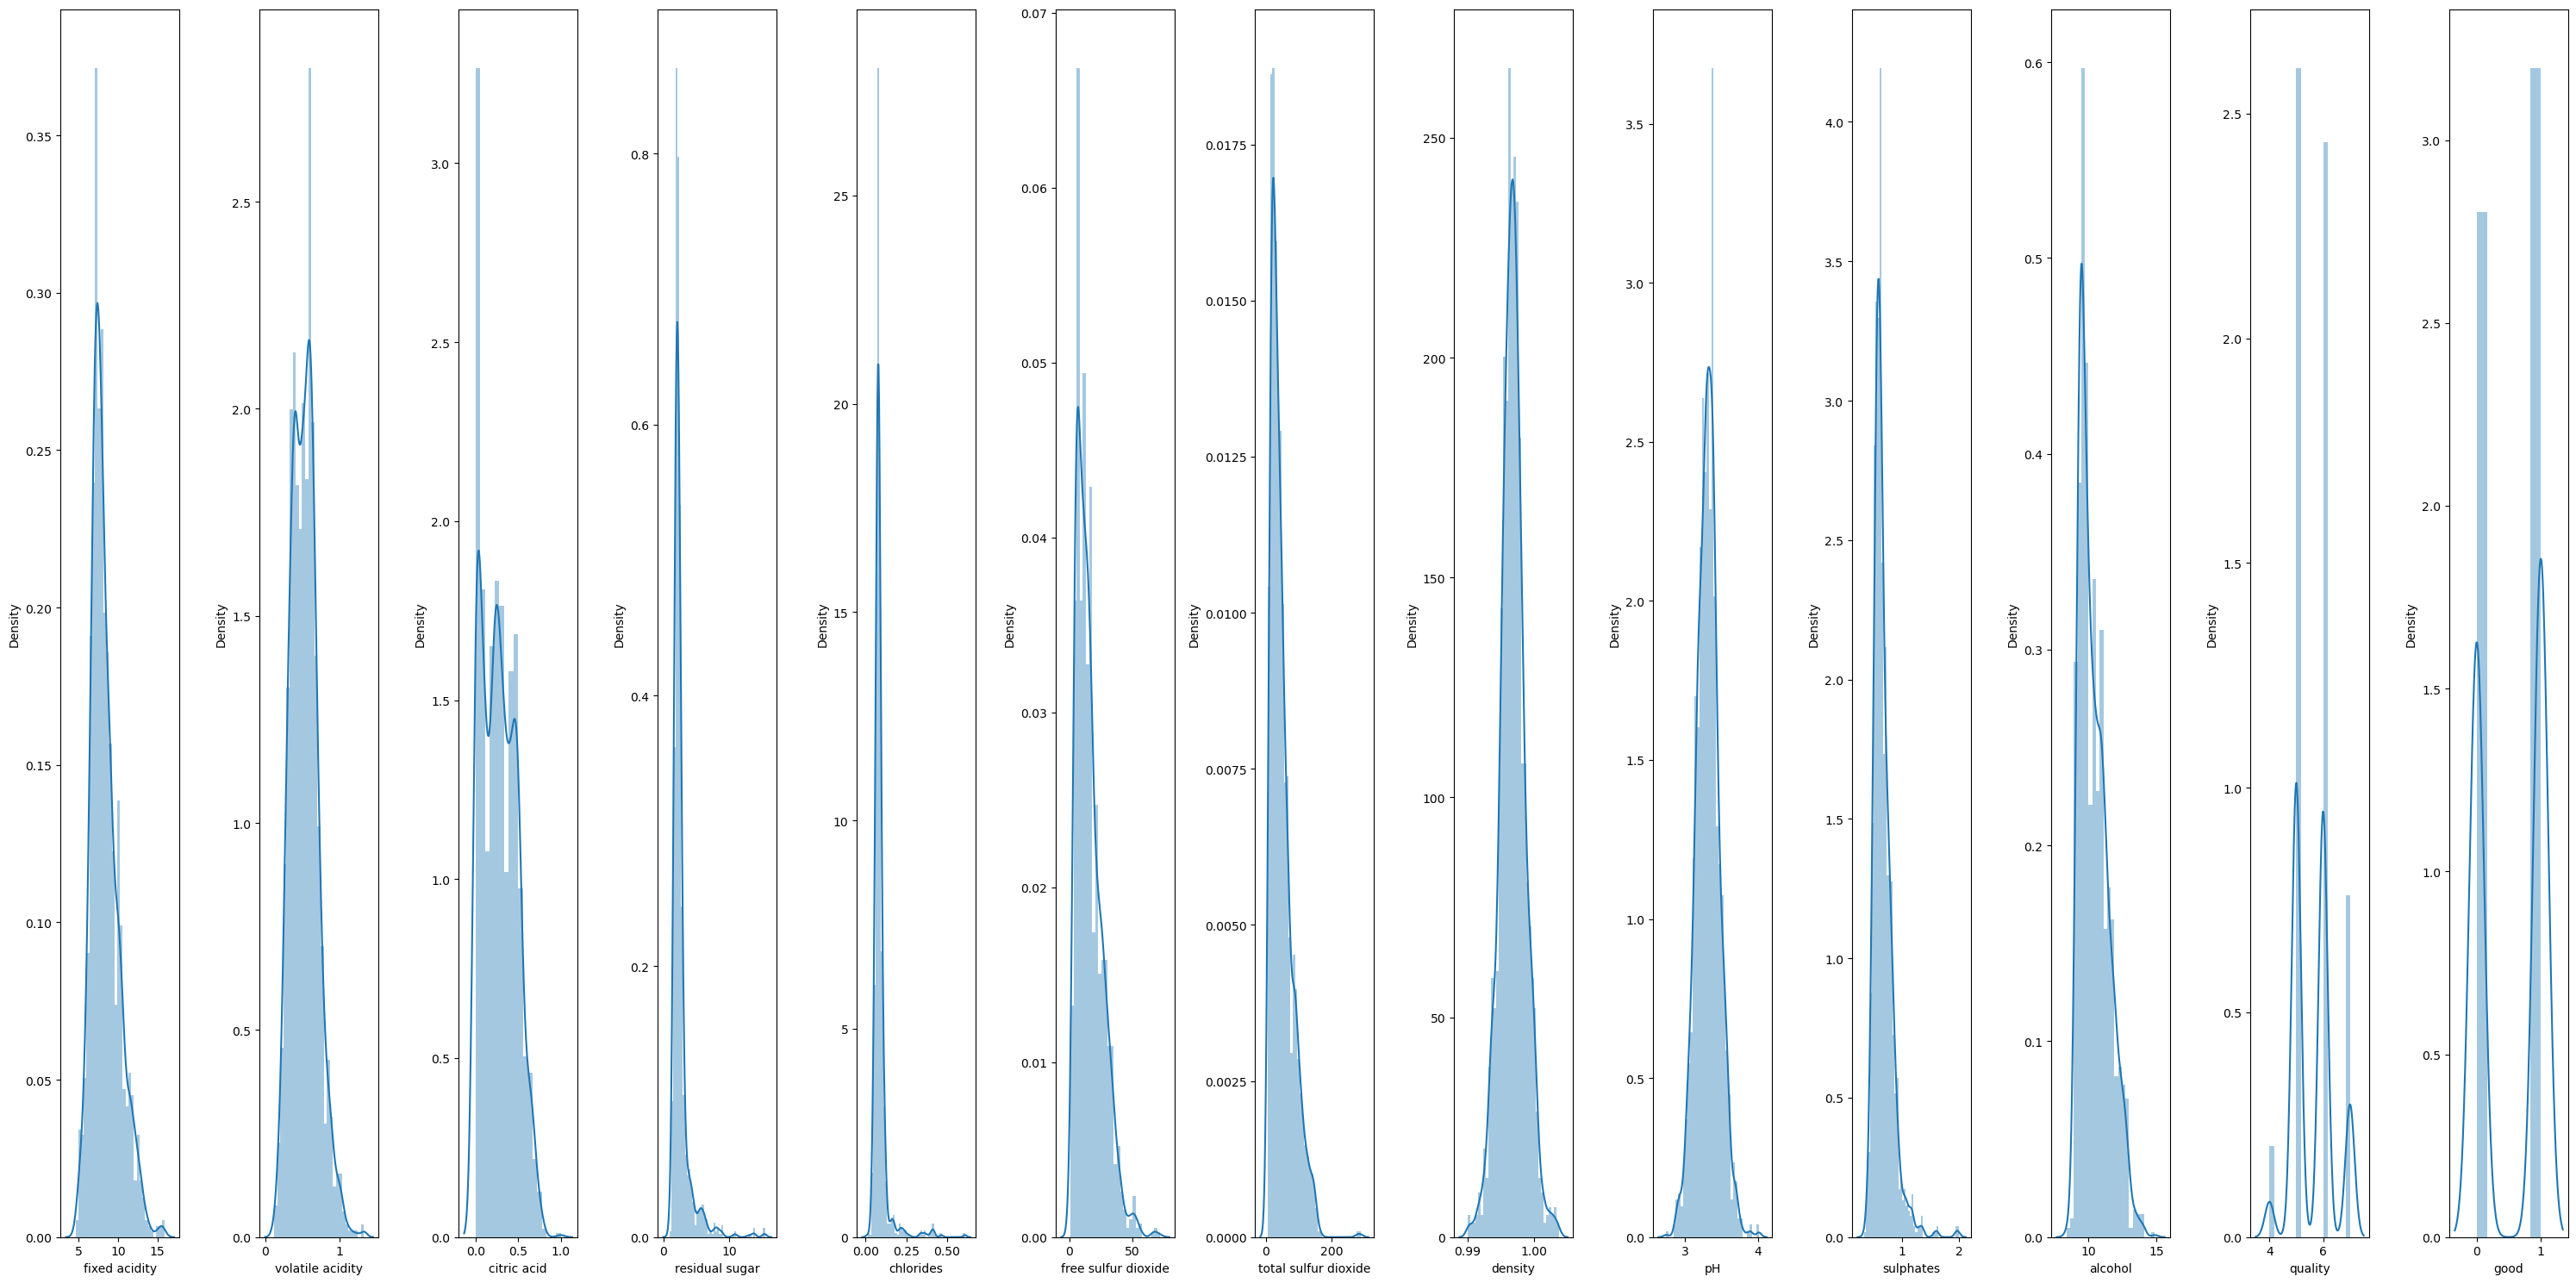

In [98]:
fig, axes = plt.subplots(ncols=len(df_clean.columns), figsize=(30,15))
for ax, col in zip(axes, df_clean.columns):
    sns.distplot(df_clean[col], ax=ax)
    plt.tight_layout() 
plt.show()

In [93]:
# постройте матрицу корреляции между признаками

In [101]:
df_clean.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
fixed acidity,1.000000,-0.254979,0.668055,0.112726,0.093603,-0.153287,-0.110548,0.668446,-0.681691,0.185738,-0.056086,0.132455,0.095608
volatile acidity,-0.254979,1.000000,-0.550466,-0.000938,0.054441,-0.002193,0.084952,0.023945,0.223166,-0.252713,-0.208159,-0.371912,-0.313304
citric acid,0.668055,-0.550466,1.000000,0.144541,0.210872,-0.058883,0.039963,0.365142,-0.536324,0.311397,0.111581,0.216625,0.152509
residual sugar,0.112726,-0.000938,0.144541,1.000000,0.058815,0.196394,0.210238,0.355289,-0.087517,0.006907,0.038797,0.015644,-0.002028
chlorides,0.093603,0.054441,0.210872,0.058815,1.000000,0.005713,0.050730,0.200790,-0.269856,0.382763,-0.216637,-0.110691,-0.101997
free sulfur dioxide,-0.153287,-0.002193,-0.058883,0.196394,0.005713,1.000000,0.666647,-0.016526,0.070912,0.052165,-0.072443,-0.057308,-0.063396
total sulfur dioxide,-0.110548,0.084952,0.039963,0.210238,0.050730,0.666647,1.000000,0.076190,-0.070018,0.043404,-0.209803,-0.203880,-0.235628
density,0.668446,0.023945,0.365142,0.355289,0.200790,-0.016526,0.076190,1.000000,-0.341393,0.157177,-0.489172,-0.155828,-0.151687
pH,-0.681691,0.223166,-0.536324,-0.087517,-0.269856,0.070912,-0.070018,-0.341393,1.000000,-0.196786,0.205099,-0.040834,0.003572
sulphates,0.185738,-0.252713,0.311397,0.006907,0.382763,0.052165,0.043404,0.157177,-0.196786,1.000000,0.086381,0.241592,0.211075
